## 1-Generación aumentada de datos - Stack con normalización de valor máximo y filtro de fondo

In [12]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/Imagenes/'

""""
# Sub Rutas iluminacion + camara
c = ['Concord_DCC3260C_No_correccion/',
 'Concord_exo304CU3_No_correccion/',
 'Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'Concord_IMX253MZR_No_correccion/',
 'Concord_Ojo_Humano_No_correccion/',
 'Concord_PL_D755CU_No_correccion/',
 'DL11_DCC3260C_No_correccion/',
 'DL11_exo304CU3_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'DL11_IMX253MZR_No_correccion/',
 'DL11_Ojo_Humano_No_correccion/',
 'DL11_PL_D755CU_No_correccion/',
 'Fluorescente_DCC3260C_No_correccion/',
 'Fluorescente_exo304CU3_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'Fluorescente_IMX253MZR_No_correccion/',
 'Fluorescente_Ojo_Humano_No_correccion/',
 'Fluorescente_PL_D755CU_No_correccion/',
 'LCD_DCC3260C_No_correccion/',
 'LCD_exo304CU3_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'LCD_IMX253MZR_No_correccion/',
 'LCD_Ojo_Humano_No_correccion/',
 'LCD_PL_D755CU_No_correccion/',
 'Philips_DCC3260C_No_correccion/',
 'Philips_exo304CU3_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'Philips_IMX253MZR_No_correccion/',
 'Philips_Ojo_Humano_No_correccion/',
 'Philips_PL_D755CU_No_correccion/',
 'RXD2_DCC3260C_No_correccion/',
 'RXD2_exo304CU3_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'RXD2_IMX253MZR_No_correccion/',
 'RXD2_Ojo_Humano_No_correccion/',
 'RXD2_PL_D755CU_No_correccion/',
 'Sylvania_DCC3260C_No_correccion/',
 'Sylvania_exo304CU3_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Sylvania_IMX253MZR_No_correccion/',
 'Sylvania_Ojo_Humano_No_correccion/',
 'Sylvania_PL_D755CU_No_correccion/',
 'Toshiba_DCC3260C_No_correccion/',
 'Toshiba_exo304CU3_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Toshiba_IMX253MZR_No_correccion/',
 'Toshiba_Ojo_Humano_No_correccion/',
 'Toshiba_PL_D755CU_No_correccion/',
 'Willard_DCC3260C_No_correccion/',
 'Willard_exo304CU3_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/',
 'Willard_IMX253MZR_No_correccion/',
 'Willard_Ojo_Humano_No_correccion/',
 'Willard_PL_D755CU_No_correccion/']

"""

c = ['Concord_IMX250MYR_No_correccion/']

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

mm = [m1, m2, m3, m4, m5]
#mm = [m6, m7]
ii = [i1, i2, i3, i4]

In [2]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/'
m8 = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/'

ims = 'Imagenes/'

# Sub Rutas iluminacion + camara
c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']

#cs = ['3', '4', '10', '11', '17', '18', '24', '25', '31', '32', '38', '39', '45', '46', '52', '53', '59', '60'] 

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug/'

mm = [m1,m2, m3, m4, m5]
ii = [i1, i2, i3, i4]

In [7]:
# Crear carpetas para imágenes resultantes 4 stack
import os
folder = 'FilteredStack1234Aug'
for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        os.mkdir(path)

In [14]:
folder = 'MinMax'
for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        os.rmdir(path)

In [32]:
folder = 'MinMax'

for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        for fname in os.listdir(path):
            if ('_5.npy' in fname or '_100.npy' in fname):
                os.remove(os.path.join(m, ims, n, folder, fname))
                print(fname)

MinMax_M1_C1_100.npy
MinMax_M1_C1_5.npy
MinMax_M1_C2_100.npy
MinMax_M1_C2_5.npy
MinMax_M1_C3_100.npy
MinMax_M1_C3_5.npy
MinMax_M1_C4_100.npy
MinMax_M1_C4_5.npy
MinMax_M1_C5_100.npy
MinMax_M1_C5_5.npy
MinMax_M1_C6_100.npy
MinMax_M1_C6_5.npy
MinMax_M1_C7_100.npy
MinMax_M1_C7_5.npy
MinMax_M1_C8_100.npy
MinMax_M1_C8_5.npy
MinMax_M1_C9_100.npy
MinMax_M1_C9_5.npy
MinMax_M1_C10_100.npy
MinMax_M1_C10_5.npy
MinMax_M1_C11_100.npy
MinMax_M1_C11_5.npy
MinMax_M1_C12_100.npy
MinMax_M1_C12_5.npy
MinMax_M1_C13_100.npy
MinMax_M1_C13_5.npy
MinMax_M1_C14_100.npy
MinMax_M1_C14_5.npy
MinMax_M1_C15_100.npy
MinMax_M1_C15_5.npy
MinMax_M1_C16_100.npy
MinMax_M1_C16_5.npy
MinMax_M1_C17_100.npy
MinMax_M1_C17_5.npy
MinMax_M1_C18_100.npy
MinMax_M1_C18_5.npy
MinMax_M2_C1_100.npy
MinMax_M2_C1_5.npy
MinMax_M2_C2_100.npy
MinMax_M2_C2_5.npy
MinMax_M2_C3_100.npy
MinMax_M2_C3_5.npy
MinMax_M2_C4_100.npy
MinMax_M2_C4_5.npy
MinMax_M2_C5_100.npy
MinMax_M2_C5_5.npy
MinMax_M2_C6_100.npy
MinMax_M2_C6_5.npy
MinMax_M2_C7_100.npy
M

In [31]:
if (4 > 5 or 4>3):
    print('See')

See


In [4]:
import os
import shutil

folder = 'FilteredStack1'
for m in mm:
    for n in c:
        path = os.path.join(m, ims, n, folder)
        shutil.rmtree(path)

# Disco

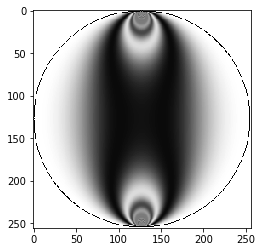

In [9]:
a1 = cv2.imread(m1 + c[0] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a1, cmap='gray')

In [11]:
df = pd.DataFrame(a1)
# df.to_excel('a1.xlsx')

In [12]:
a1.shape

(256, 256)

In [15]:
a2 = a1.copy()

In [16]:
a2.sum()

10483493

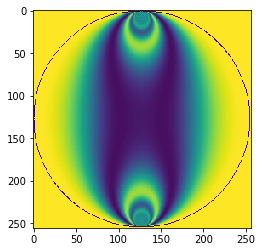

In [13]:
plt.imshow(a1)

In [18]:
for i in range(256):
    for j in range(256):
        if ((i-128)**2)+((j-128)**2) > (128)**2:
            a2[i,j] = 0

In [19]:
a2.sum()

6911198

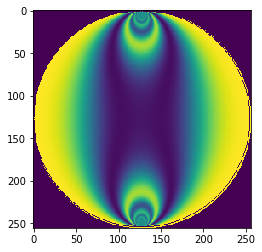

In [20]:
plt.imshow(a2)

In [3]:
def filtro_disco(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                a1[i,j] = 0    
    return a1

# Anillo

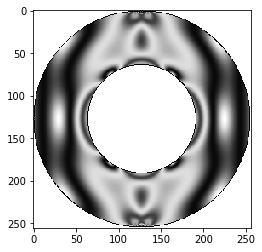

In [22]:
a3 = cv2.imread(m2 + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a3, cmap='gray')

In [23]:
df2 = pd.DataFrame(a3)
#df2.to_excel('a3.xlsx')

In [24]:
a4 = a3.copy()

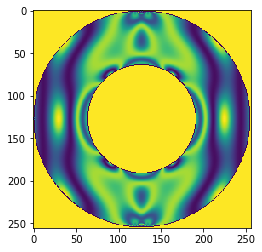

In [25]:
plt.imshow(a3)

In [26]:
for i in range(256):
    for j in range(256):
        value = ((i-128)**2)+((j-128)**2)
        if (value >= (126)**2) or (value < (64)**2):
            a4[i,j] = 0

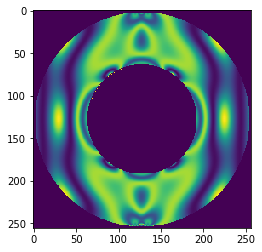

In [27]:
plt.imshow(a4)

In [4]:
def filtro_anillo(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                a1[i,j] = 0   
    return a1

# Placa

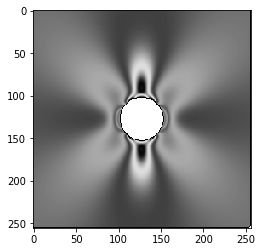

In [30]:
a5 = cv2.imread(m3 + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a5, cmap='gray')

In [31]:
df3 = pd.DataFrame(a5)
#df3.to_excel('a5.xlsx')

In [32]:
a6 = a5.copy()

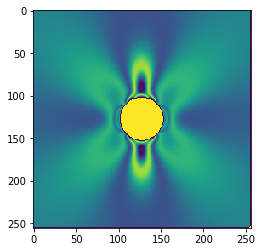

In [33]:
plt.imshow(a5)

In [34]:
for i in range(256):
    for j in range(256):
        value = ((i-128)**2)+((j-128)**2)
        if (value < (26)**2):
            a6[i,j] = 0

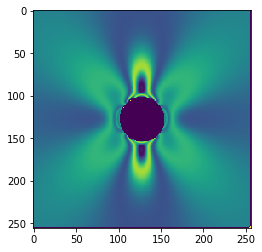

In [35]:
plt.imshow(a6)

In [5]:
def filtro_placa(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                a1[i,j] = 0   
    return a1

# Viga distribuida

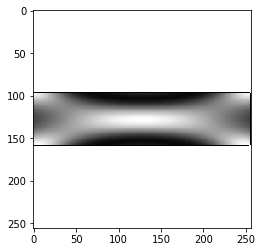

In [37]:
a7 = cv2.imread(m4 + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a7, cmap='gray')

In [38]:
df4 = pd.DataFrame(a7)
#df4.to_excel('a7.xlsx')

In [39]:
a8 = a7.copy()

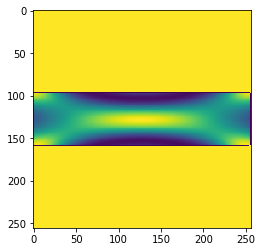

In [40]:
plt.imshow(a7)

In [41]:
for i in range(256):
    for j in range(256):
        if (i < 96 or i > 159):
            a8[i,j] = 0

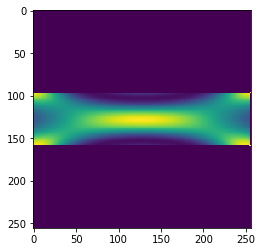

In [42]:
plt.imshow(a8)

# Viga puntual

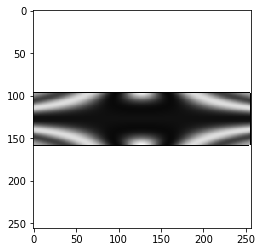

In [44]:
a9 = cv2.imread(m5 + c[3] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a9, cmap='gray')

In [45]:
df5 = pd.DataFrame(a9)
#df5.to_excel('a9.xlsx')

In [46]:
a10 = a9.copy()

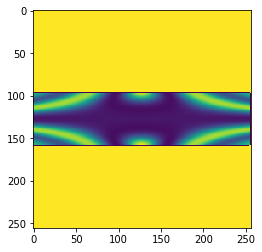

In [47]:
plt.imshow(a9)

In [48]:
for i in range(256):
    for j in range(256):
        if (i < 96 or i > 159):
            a10[i,j] = 0

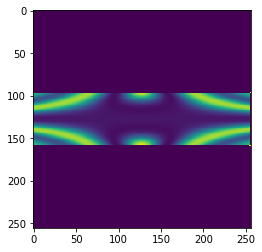

In [49]:
plt.imshow(a10)

In [6]:
def filtro_viga(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                a1[i,j] = 0   
    return a1

# Estructura Vertical

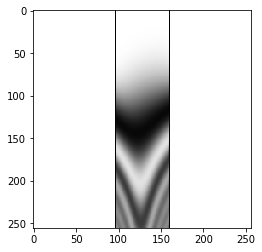

In [5]:
a11 = cv2.imread(m6 + ims + c[0] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a11, cmap='gray')

In [6]:
df6 = pd.DataFrame(a11)
#df6.to_excel('a11.xlsx')

In [8]:
a12 = a11.copy()

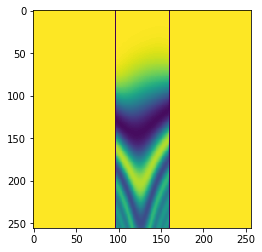

In [9]:
plt.imshow(a11)

In [10]:
for i in range(256):
    for j in range(256):
        if (j < 96 or j > 160):
            a12[i,j] = 0

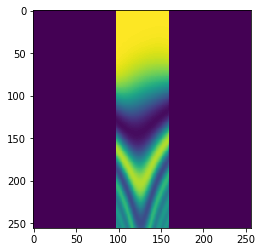

In [11]:
plt.imshow(a12)

In [7]:
def filtro_vertical(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (j < 96 or j > 160):
                a1[i,j] = 0   
    return a1

# Ménsula

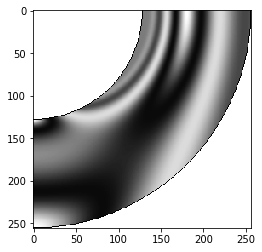

In [29]:
a13 = cv2.imread(m7 + ims + c[0] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a13, cmap='gray')

In [30]:
df7 = pd.DataFrame(a13)
#df7.to_excel('a13.xlsx')

In [55]:
a14 = a13.copy()

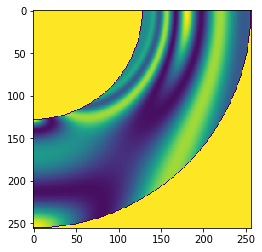

In [56]:
plt.imshow(a14)

In [57]:
for i in range(256):
    for j in range(256):
        value = ((i)**2)+((j)**2)
        if (value >= (256)**2) or (value <= (128)**2):
            a14[i,j] = 0

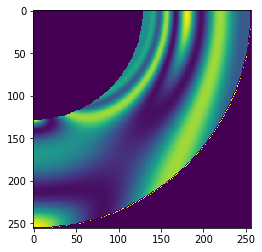

In [58]:
plt.imshow(a14)

In [8]:
def filtro_mensula(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i)**2)+((j)**2)
            if (value >= (256)**2) or (value <= (128)**2):
                a1[i,j] = 0
    return a1

# Muesca

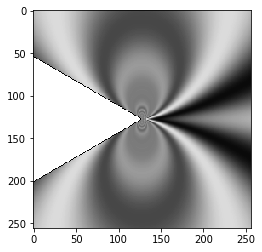

In [27]:
a15 = cv2.imread(m8 + ims + c[0] + 'Img_1/Img1_100.bmp')[:,:,1]
plt.imshow(a15, cmap='gray')

In [54]:
df8 = pd.DataFrame(a15)
df8.to_excel('a15.xlsx')

In [55]:
a16 = a15.copy()

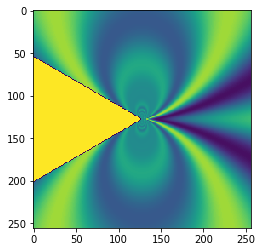

In [56]:
plt.imshow(a16)

In [99]:
a16 = a15.copy()
for i in range(256): #filas
    for j in range(256): #columnas
        value1 = (j + 1.77*(i-130) - 126)
        value2 = (j - 1.67*(i-129) - 129)
        if (value1 < 0) and (value2 < 0):
            a16[i,j] = 0

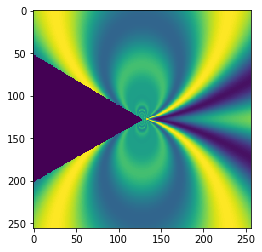

In [100]:
plt.imshow(a16)

In [9]:
def filtro_muesca(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256): #filas
        for j in range(256): #columnas
            value1 = (j + 1.77*(i-130) - 126)
            value2 = (j - 1.67*(i-129) - 129)
            if (value1 < 0) and (value2 < 0):
                    a1[i,j] = 0
    return a1

# Generación de stacks

In [10]:
def get_filtro(m, url):
    if 'Disco' in m:
        return filtro_disco(url)
    elif 'Anillo' in m:
        return filtro_anillo(url)
    elif 'Placa' in m:
        return filtro_placa(url)
    elif 'Viga' in m:
        return filtro_viga(url)
    elif 'Estructura' in m:
        return filtro_vertical(url)
    elif 'Mensula' in m:
        return filtro_mensula(url)
    elif 'Muesca' in m:
        return filtro_muesca(url)

### Aplicar filtro a todas las imágenes y generar stacks

In [104]:
for m in mm:                           #Recorrer cada uno de los 7 modelos
    for z in c:                        #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
        url_base = m + ims + z
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, url_base + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, url_base + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, url_base + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, url_base + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1,101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB                
            a1 = get_filtro(m, url_base + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
            a2 = get_filtro(m, url_base + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
            a3 = get_filtro(m, url_base + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
            a4 = get_filtro(m, url_base + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4
            a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
            a5 = a5/valor                                # Normalización por valor máximo
            np.save(m + ims + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M'+ str(mm.index(m)+8) + '_C' + str(c.index(z)+1) +  '_' + str(n) + '.npy', a5) #Guardar stack

### Validación de generación correcta de imágenes

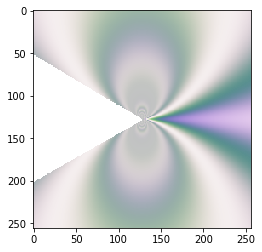

In [106]:
im = np.load(m8 + ims + c[0] + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M8' + '_C1' + '_' + str(100) + '.npy')
plt.imshow(im, cmap='gray')

Text(0.5,1,'Imagen objetivo')

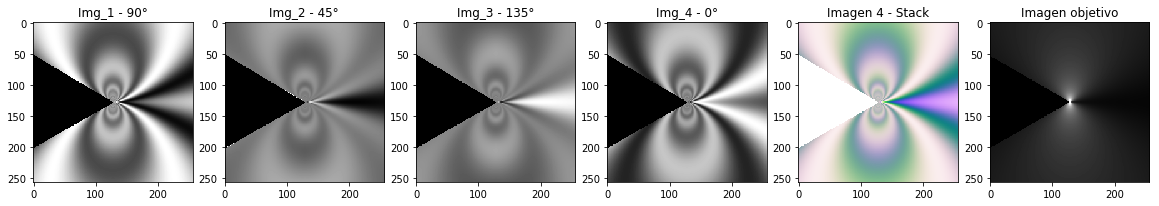

In [17]:
m = m8
z = c[1]
n = 100
     
i90 = get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp')    #Imagen 1
i45 = get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp')    #Imagen 2
i135 = get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp')    #Imagen 3
i0 = get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp')    #Imagen 4

stack = np.load(m + ims + z + 'FilteredStack1234Aug/FilteredStack1234Aug_M8_C2_' + str(n) + '.npy')
obj = np.loadtxt(m + 'PNA8/' + 'PN_' + str(100) + '.txt')

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20,20))
ax1.imshow(i90, cmap='gray')
ax1.set_title('Img_1 - 90°')
ax2.imshow(i45, cmap='gray')
ax2.set_title('Img_2 - 45°')
ax3.imshow(i135, cmap='gray')
ax3.set_title('Img_3 - 135°')
ax4.imshow(i0, cmap='gray')
ax4.set_title('Img_4 - 0°')
ax5.imshow(stack, cmap='gray')
ax5.set_title('Imagen 4 - Stack')
ax6.imshow(obj, cmap='gray')
ax6.set_title('Imagen objetivo')